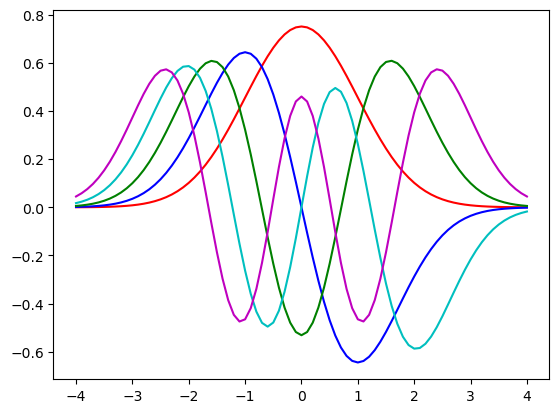

[0.999735791146756,
 2.999002601920993,
 4.99846305768133,
 6.9975810324427945,
 8.996254353940936]

In [245]:
#Part A

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

K = 1
#n0 = 50
L = 4
tol = 1e-4   
col = ['r', 'b', 'g', 'c', 'm', 'k']  # Colors for eigenfunctions

def shoot(x, y, E):
    return [y[1], (K * x**2 - E) * y[0]]

x = np.arange(-L, L + 0.1, 0.1)  # Simulate from -L to L

eigenvalues = []
eigenfunctions = []  

E_start = .1 # Initial guess for the eigenvalue

for modes in range(1, 6):
    E = E_start
    dE = E_start / 100
    for _ in range(1000):
        y0 = [1, np.sqrt(L**2 - E)]
        ysola = solve_ivp(shoot, [x[0],x[-1]], y0, args=(E,), t_eval=x)
        ysa = ysola.y.T
        xsa = ysola.t

        if abs(ysa[-1, 1] + np.sqrt(L**2 - E) * ysa[-1, 0] - 0) < tol:
            eigenvalues.append(E)
            #eigenfunctions.append(np.abs(ys[:, 0])) # Save absolute values of eigenfunction
            break
        if (-1) ** (modes + 1) * (ysa[-1, 1] + np.sqrt(L**2 - E) * ysa[-1, 0]) > 0:
            E += dE        
        else:
            E -= dE  
            dE /= 2  

    
    E_start = E + 0.1
    
    norm = np.trapz(ysa[:, 0]**2, xsa) 
    eigenfunctions.append(np.abs(ysa[:, 0] / np.sqrt(norm)))
    plt.plot(x, ysa[:, 0] / np.sqrt(norm), col[modes - 1])
    

plt.show()
ei = np.array(eigenfunctions) # Stack columns to form a matrix
A1 = ei.T
A2 = eigenvalues 
A2

array([0.99937352, 2.996839  , 4.99140656, 6.98038865, 8.95060003])

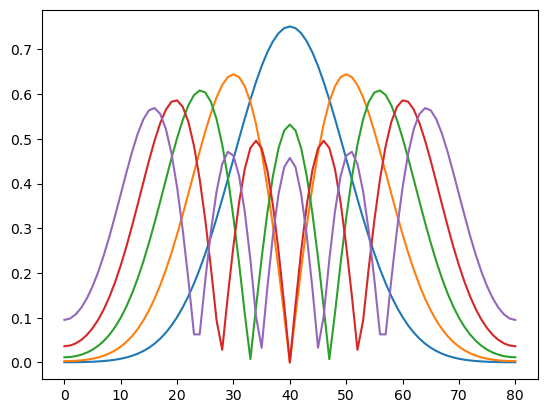

In [198]:
#(b)
import numpy as np
from scipy.sparse.linalg import eigs 
import matplotlib.pyplot as plt

K = 1
L = 4
dx = 0.1
x = np.arange(-L, L + dx, dx) 
N = len(x)

A = np.zeros((N-2, N-2))

# Fill the interior points
for j in range(N - 2):
    if j < N - 3:  
        A[j, j + 1] = 1   # Upper diagonal
    A[j, j] = -2 - (K * x[j + 1]**2) * dx**2  # Main diagonal
    if j > 0:
        A[j, j - 1] = 1  # Lower diagonal

A[0, 0] += 4/3
A[0, 1] -= 1/3  
A[-1, -1] += 4/3   
A[-1, -2] -= 1/3  

eigvals, eigvecs = eigs(-A, which = "SM")

V2 = np.vstack((4/3 * eigvecs[0, :] -1/3 * eigvecs[1,:], eigvecs, 4/3 * eigvecs[-1,:] - 1/3 * eigvecs[-2, :]))

ysolb = np.zeros((N, 5))
Esolb = np.zeros(5)

for j in range(5):
    norm = np.sqrt(np.trapz(V2[:, j]**2, x))
    ysolb[:, j] = np.abs(V2[:, j] /norm)

Esolb = np.sort(eigvals[:5] / dx**2)


A3 = ysolb
A4 = Esolb.real

plt.plot(ysolb)
A4

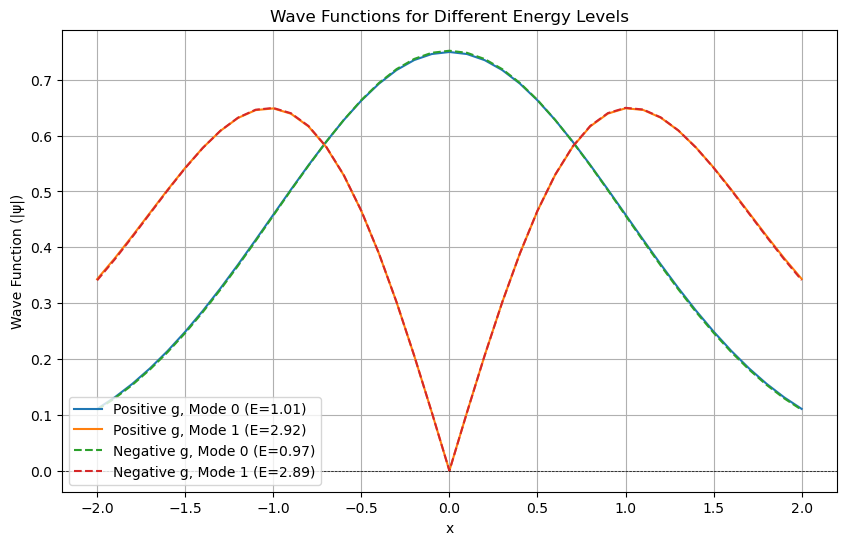

In [199]:
# Part c
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



def nlshoot(x, y, g, E):
    return [y[1], (g * y[0]**2 + x**2 - E) * y[0]]
    
L = 2
tol = 1e-4   
x = np.arange(-L, L + 0.1 , 0.1)  # Simulate from -L to L
n = len(x)


pE , psol = np.zeros(2), np.zeros((n, 2))
nE, nsol = np.zeros(2), np.zeros((n, 2))


for g in [0.05, -0.05]:
    E0 = 0.1
    A0 = 1e-6
    for jmodes in range(2):
        dA = 0.01
        for jj in range(100):
            E = E0
            dE = 0.2
            for j in range(100):
                y_init = [A0 , np.sqrt(L**2 - E) * A0]
                ysol = solve_ivp(lambda x, y: nlshoot(x,y,g,E), [x[0],x[-1]], y_init, t_eval=x)
                #ysol = solve_ivp(shoot, [x[0],x[-1]], y0, args=(E, g), t_eval = x)
                ys = ysol.y.T
                xs = ysol.t
                #ysol = solve_ivp(shoot, t_span = [-L, L], y0 = y_init, args=(E, g), t_eval = x)
                #y= ysol["y"][0,:]
                #y_prime = ysol["y"][1,:]

                #if abs(y_prime[-1] + np.sqrt(L**2 - E) * y[-1] - 0) < tol:
                if abs(ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0] - 0) < tol:
                    break
                    
                #if (-1) ** (modes + 1) * (y_prime[-1] + np.sqrt(L**2 - E) * y[-1]) > 0:
                if (-1) ** (jmodes) * (ys[-1, 1] + np.sqrt(L**2 - E) * ys[-1, 0]) > 0:
                    E += dE        
                else:
                    E -= dE  
                    dE /= 2
            area = np.trapz(ys[:,0]**2,  xs)
            if np.abs(area - 1) < tol: 
                break
            if area < 1:
                A0 += dA
            if area > 1:
                A0 -= dA
                dA /= 2
        E0 = E + 0.2
        if g > 0:
            pE[jmodes] = E
            psol[:, jmodes] = np.abs(ys[:,0])
        else:
            nE[jmodes] = E
            nsol[:, jmodes] = np.abs(ys[:,0])
A5 = psol
A6 =  pE
A7 = nsol
A8 = nE

plt.figure(figsize=(10, 6))

# Positive g
plt.plot(x, psol[:, 0], label=f'Positive g, Mode 0 (E={pE[0]:.2f})')
plt.plot(x, psol[:, 1], label=f'Positive g, Mode 1 (E={pE[1]:.2f})')

# Negative g
plt.plot(x, nsol[:, 0], label=f'Negative g, Mode 0 (E={nE[0]:.2f})', linestyle='--')
plt.plot(x, nsol[:, 1], label=f'Negative g, Mode 1 (E={nE[1]:.2f})', linestyle='--')

plt.title('Wave Functions for Different Energy Levels')
plt.xlabel('x')
plt.ylabel('Wave Function (|ψ|)')
plt.axhline(0, color='k', linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

In [239]:
#Part D

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


def hw2_rhs_a(x, y, E):
    return [y[1], (x**2 - E) * y[0]]

L = 2
#x = np.arange(-L, L + 0.1 , 0.1)
x_span = [-L,L]
E = 1
A = 1
y0 = [A, A * np.sqrt(L**2 - E)]

tols = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

dt45= []
dt23 = []
dtrad = []
dtBDF = []

for Tol in tols:
    options = {'rtol': Tol, 'atol': Tol}
    
    #sol_45 = solve_ivp(hw2_rhs_a , [x[0] , x[-1]], y0, method = 'RK45', args=(E,), **options)
    sol_45 = solve_ivp(hw2_rhs_a , x_span, y0, method = 'RK45', args=(E,), **options)
    sol_23 = solve_ivp(hw2_rhs_a , x_span, y0, method='RK23', args=(E,), **options)
    sol_rad = solve_ivp(hw2_rhs_a , x_span, y0, method='Radau', args=(E,), **options)
    sol_BDF = solve_ivp(hw2_rhs_a , x_span, y0, method='BDF', args=(E,), **options)
    
    avg_step_size_rk45 = np.mean(np.diff(sol_45.t))
    dt45.append(avg_step_size_rk45)

    avg_step_size_rk23 = np.mean(np.diff(sol_23.t))
    dt23.append(avg_step_size_rk23)

    avg_step_size_rad = np.mean(np.diff(sol_rad.t))
    dtrad.append(avg_step_size_rad)
    
    avg_step_size_BDF = np.mean(np.diff(sol_BDF.t))
    dtBDF.append(avg_step_size_BDF)

#Perform linear regression (Log-Log) to determine the slopes
fit45 =  np.polyfit(np.log(dt45), np.log(tols),1)
fit23 = np.polyfit(np.log(dt23), np.log(tols), 1)
fit_rad = np.polyfit(np.log(dtrad), np.log(tols), 1)
fit_BDF = np.polyfit(np.log(dtBDF), np.log(tols), 1)


A9 = np.array([[fit45[0]], [fit23[0]], [fit_rad[0]], [fit_BDF[0]]])
A9 = A9.flatten()
A9

array([5.24466756, 3.01909953, 4.03819927, 6.45751261])

In [249]:
#Part E

import numpy as np
import math 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

L = 4
x = np.arange(-L, L + 0.1, 0.1)  # Simulate from -L to L
h = np.array([np.ones_like(x), 2 * x, 4*x**2 - 2, 8 * x ** 3 - 12 * x, 16 * x ** 4 - 48 * x ** 2 + 12])
phi = np.zeros((h.shape[1],5))

for j in range(5):
    #phi[:,j] = [np.exp(-x**2 / 2)(h[j,:]) / np.sqrt(np.factorial(j) * 2**j * np.sqrt(np.pi))].T 
    phi[:, j] = np.exp(-x**2 / 2) * h[j, :] / np.sqrt(math.factorial(j) * 2**j * np.sqrt(np.pi))


erps_a = np.zeros(5)
erps_b = np.zeros(5)
er_a = np.zeros(5)
er_b = np.zeros(5)

for j in range(5):
    erps_a[j] = np.trapz((np.abs(A1[:,j]) - np.abs(phi[:,j]))**2, x)
    erps_b[j] = np.trapz((np.abs(A3[:,j]) - np.abs(phi[:,j]))**2, x)
    er_a[j] = 100 * np.abs(A2[j] - (2*j + 1)) / (2*j + 1)
    er_b[j] = (100 * np.abs(A4[j] - (2*j + 1))) / (2*j + 1)


A10 = erps_a
A11 = er_a
A12 = erps_b
A13 = er_b
A13

array([0.0626477 , 0.10536673, 0.1718688 , 0.28016214, 0.54888859])